In [3]:
from google.colab import drive
drive.mount('/content/Drive', force_remount=True)


Mounted at /content/Drive


In [4]:
import sys
sys.path.append('/content/Drive/MyDrive/Colab Notebooks/Modulos')
print(sys.path)

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython', '/content/Drive/MyDrive/Colab Notebooks/Modulos']


In [5]:
from mnn import MDlayer
from DEN import DENlayer
from DSN import DSNlayer
from sklearn.datasets import make_moons, make_circles
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Rectangle 


In [6]:
x,y = make_moons(n_samples=100, shuffle=True, noise=None, random_state=None)
#x,y = make_circles(n_samples=100, shuffle=True, noise=None, random_state=None,factor=0.5)


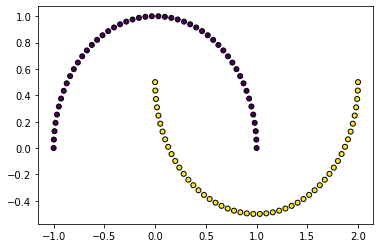

In [7]:

plt.scatter(x[:, 0], x[:, 1], marker='o', c=y,
            s=25, edgecolor='k')
plt.show()

In [12]:
from keras.models import Sequential 
from keras.layers.core import Dense, Dropout, Activation  

model = Sequential()
#model.add(MDlayer(10,  activation='relu',input_shape=(2,) ))  
#model.add(DSNlayer(3, activation='relu',input_shape=(2,) ))  
#model.add(DENlayer(4,dendritas , activation='relu',input_shape=(2,) ))  
#model.add(MDlayer(2, activation='tanh'))
#model.add(Dense(3, activation='relu', input_shape=(2,) ))  
#model.add(DSNlayer(10, activation='relu'))
#model.add(Dense(10, activation='softmax'))
model.add(DSNlayer(1, activation='sigmoid'))
model.summary()

ValueError: ignored

In [14]:
from keras import optimizers
from keras.callbacks import ModelCheckpoint

model_name = 'moons.h5'
epochs = 100
batch = 5
learning_rate = 0.01

adam = optimizers.Adam(lr=learning_rate)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath=model_name, monitor='accuracy', verbose=0, 
                               save_best_only=True, mode='max', save_freq='epoch')


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


[[0.23386493]
 [0.2338387 ]
 [0.2338126 ]
 ...
 [0.25469816]
 [0.2547747 ]
 [0.25485116]]


Text(0, 0.5, 'x2')

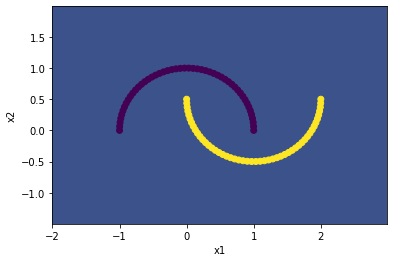

In [16]:
# Decision Boundary
h = 0.01
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[ yy.ravel(),xx.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)
print(out)
out = (out >= 0.5).astype(int)
out = out.reshape(xx.shape)


fig = plt.figure()
ax = fig.add_subplot(111)
#rect = plt.Rectangle((xbox[0],ybox[0]),xbox[1]-xbox[0],ybox[1]-ybox[0])
#ax.add_patch(rect)
#rect = plt.Rectangle((xbox[2],ybox[2]),xbox[3]-xbox[2],ybox[3]-ybox[2])
#ax.add_patch(rect)


plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.scatter(xbox, ybox, c ='r')#['r','b','black','white'])
plt.xlabel('x1')
plt.ylabel('x2')



In [17]:
h = model.fit(x, y, batch_size=batch, epochs=50, verbose=1,  
             callbacks=[checkpointer])

Epoch 1/50
20/20 [==============================] - 8s 1ms/step - loss: 0.8395 - accuracy: 0.4816
Epoch 2/50
20/20 [==============================] - 0s 1ms/step - loss: 0.7253 - accuracy: 0.4655
Epoch 3/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6621 - accuracy: 0.5481
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6340 - accuracy: 0.8237
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.6252 - accuracy: 0.7938
Epoch 6/50
20/20 [==============================] - 0s 1ms/step - loss: 0.6004 - accuracy: 0.8482
Epoch 7/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5906 - accuracy: 0.8306
Epoch 8/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5897 - accuracy: 0.8086
Epoch 9/50
20/20 [==============================] - 0s 1ms/step - loss: 0.5755 - accuracy: 0.7755
Epoch 10/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.8682
Epoch 11/50
20/20 [

In [18]:
print(model.layers)
weights = []
xbox = []
ybox = []
for layer in model.layers:
    weights.append(layer.get_weights())
print(len(weights))
print((weights[0][0][0][1]))
print(weights)
for i in range (len(weights[0][0])):
  for j in range(len(weights[0][0][0])):
    print("xb:",weights[0][0][i][j])
    xbox.append(weights[0][0][i][j])
    print("yb:",weights[0][1][i][j])
    ybox.append(weights[0][1][i][j])


[<keras.layers.core.Dense object at 0x7f054ee98550>, <DSN.DSNlayer object at 0x7f054ede5610>]
2
-0.5209284
[[array([[-0.3188798 , -0.5209284 , -0.4852539 , -1.1082188 , -0.51672757,
        -0.49418834, -0.52276486, -0.5220635 ,  1.1858921 , -0.42221358],
       [-0.5292514 , -1.1733204 , -1.5938107 ,  4.439349  , -0.32032615,
        -0.897519  ,  0.07845448, -1.1273377 , -4.509809  , -0.9803428 ]],
      dtype=float32), array([-2.0230474, -2.2174504, -1.5329324,  1.3455827, -1.9675319,
       -2.4315214, -1.761024 , -2.70742  ,  2.092125 , -1.7085887],
      dtype=float32)], [array([[[ 1.7755508e-03,  1.5377084e-03,  3.6976461e-03, -4.5957184e-01,
          1.3736928e-03,  1.1851529e-03,  1.2975917e-03,  8.1458979e-04,
          1.4412333e+00,  2.6050126e-03]]], dtype=float32), array([[1.3648372]], dtype=float32)]]
xb: -0.3188798


IndexError: ignored

ValueError: ignored

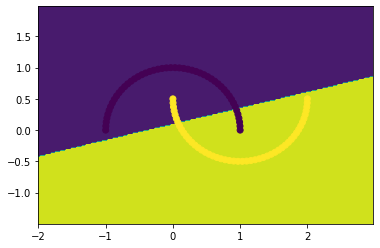

In [19]:
# Decision Boundary
h = 0.02
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = np.c_[xx.ravel(), yy.ravel()]
out = model.predict(Z, batch_size = 1024, verbose = 0)

out = (out >= 0.5).astype(int)
out = out.reshape(xx.shape)

plt.contourf(xx, yy, out)
plt.scatter(x[:, 0], x[:, 1], c = y)
plt.scatter(xbox, ybox, c ='r')#['r','b','black','white'])

plt.xlabel('x1')
plt.ylabel('x2')

In [20]:
def nhb_per_class(P,T,M,n=2):
  dendrite = []
  C = np.unique(T)
  print(C.size)
  if C.size:
    for c in C:
       pos_c = np.where(T == c)[0]
       
       if pos_c.size == 1:
         continue
       print(pos_c)
       [w,b] = generateWB()
       #[dendrite(c).W,dendrite(c).B] = dividing_hb(w,b,n);

  return dendrite


In [21]:
nhb_per_class(x,[0,0,1,2,1],0)

3
[0 1]


NameError: ignored